# DATA CLEANING 

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

Data cleaning consist of Following steps:
1. Removing Duplicate values.
2. Removing NUll values.
3. Standardizing data formate.
4. Filter unwanted outliers.

We will do through these all steps to clean our data. 
Lets ! start 

In [188]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [189]:
df=pd.read_csv("car_details.csv")

In [190]:
df.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [192]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [193]:
df.shape

(8128, 13)

In [194]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

We can see above our data consist of 8128 rows and 13 columns

## 1. Detecting NUll Values

Now first we will look for null values present in our dataset

In [195]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

1. There are 221 null values in Mileage column.
2. 221 null values in engine column.
3. 215 null values in max_power.
4. 222 null values in torque column.
5. 221 null values in seats column.

## 2. Detecting Duplicate values in each column

Lets Go and check duplicate values in each column

In [196]:
# duplicate values in name column

duplicates=df["name"].duplicated()
duplicate_rows=df[df['name'].duplicated()]
print("Duplicated rows in name column are:")
print(duplicate_rows)

Duplicated rows in name column are:
                          name  year  selling_price  km_driven    fuel  \
28    Maruti Wagon R LXI Minor  2009         220000     120000  Petrol   
64      Maruti Swift Dzire ZDI  2015         630000     147000  Diesel   
66     Maruti Baleno Delta 1.2  2019         650000      30000  Petrol   
71    Maruti Vitara Brezza VDi  2016         745000      70000  Diesel   
73           Hyundai i10 Magna  2011         235000      60000  Petrol   
...                        ...   ...            ...        ...     ...   
8123         Hyundai i20 Magna  2013         320000     110000  Petrol   
8124     Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125    Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126           Tata Indigo CR4  2013         290000      25000  Diesel   
8127           Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \

In [197]:
# duplicate values in year column

duplicates=df["year"].duplicated()
duplicate_rows=df[df['year'].duplicated()]
print("Duplicated rows in year column are:")
print(duplicate_rows)

Duplicated rows in year column are:
                                 name  year  selling_price  km_driven    fuel  \
1        Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
6        Maruti Wagon R LXI DUO BSIII  2007          96000     175000     LPG   
10    Renault Duster 110PS Diesel RxL  2014         500000      68000  Diesel   
13               Maruti Swift 1.3 VXi  2007         200000      80000  Petrol   
14           Maruti Wagon R LXI Minor  2009         180000      90000  Petrol   
...                               ...   ...            ...        ...     ...   
8123                Hyundai i20 Magna  2013         320000     110000  Petrol   
8124            Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125           Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126                  Tata Indigo CR4  2013         290000      25000  Diesel   
8127                  Tata Indigo CR4  2013         290000      25000  Di

In [198]:
# duplicate values in selling_price  column

duplicates=df["selling_price"].duplicated()
duplicate_rows=df[df["selling_price"].duplicated()]
print("Duplicated rows in selling_price  column are:")
print(duplicate_rows)

Duplicated rows in selling_price  column are:
                           name  year  selling_price  km_driven    fuel  \
13         Maruti Swift 1.3 VXi  2007         200000      80000  Petrol   
17    Hyundai i20 1.4 CRDi Asta  2012         500000      53000  Diesel   
24      Tata Tigor 2017-2020 XZ  2018         500000      35000  Petrol   
32    Maruti Omni 8 Seater BSIV  2012         150000      35000  Petrol   
38                  Datsun GO D  2016         150000      42000  Petrol   
...                         ...   ...            ...        ...     ...   
8123          Hyundai i20 Magna  2013         320000     110000  Petrol   
8124      Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125     Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126            Tata Indigo CR4  2013         290000      25000  Diesel   
8127            Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  

In [199]:
# duplicate values in km_driven  column

duplicates=df["km_driven"].duplicated()
duplicate_rows=df[df["km_driven"].duplicated()]
print("Duplicated rows in km_driven  column are:")
print(duplicate_rows)

Duplicated rows in km_driven  column are:
                                     name  year  selling_price  km_driven  \
4                  Maruti Swift VXI BSIII  2007         130000     120000   
12                 Maruti Swift Dzire VDi  2009         280000     140000   
14               Maruti Wagon R LXI Minor  2009         180000      90000   
18                         Maruti Alto LX  2002         150000      80000   
19    Hyundai i20 2015-2017 Asta 1.4 CRDi  2016         680000     100000   
...                                   ...   ...            ...        ...   
8123                    Hyundai i20 Magna  2013         320000     110000   
8124                Hyundai Verna CRDi SX  2007         135000     119000   
8125               Maruti Swift Dzire ZDi  2009         382000     120000   
8126                      Tata Indigo CR4  2013         290000      25000   
8127                      Tata Indigo CR4  2013         290000      25000   

        fuel seller_type transmis

In [200]:
# duplicate values in fuel  column

duplicates=df["fuel"].duplicated()
duplicate_rows=df[df["fuel"].duplicated()]
print("Duplicated rows in fuel  column are:")
print(duplicate_rows)

Duplicated rows in fuel  column are:


                               name  year  selling_price  km_driven    fuel  \
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
3         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
5     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
7                Maruti 800 DX BSII  2001          45000       5000  Petrol   
...                             ...   ...            ...        ...     ...   
8123              Hyundai i20 Magna  2013         320000     110000  Petrol   
8124          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126                Tata Indigo CR4  2013         290000      25000  Diesel   
8127                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owne

In [201]:
# duplicate values in seller_type  column

duplicates=df["seller_type"].duplicated()
duplicate_rows=df[df["seller_type"].duplicated()]
print("Duplicated rows in seller_type  column are:")
print(duplicate_rows)

Duplicated rows in seller_type  column are:
                               name  year  selling_price  km_driven    fuel  \
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2          Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
5     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
8123              Hyundai i20 Magna  2013         320000     110000  Petrol   
8124          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126                Tata Indigo CR4  2013         290000      25000  Diesel   
8127                Tata Indigo CR4  2013         290000      25000  Diesel   

     se

In [202]:
# duplicate values in transmission  column

duplicates=df["transmission"].duplicated()
duplicate_rows=df[df["transmission"].duplicated()]
print("Duplicated rows in transmission  column are:")
print(duplicate_rows)

Duplicated rows in transmission  column are:
                               name  year  selling_price  km_driven    fuel  \
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2          Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
5     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
8123              Hyundai i20 Magna  2013         320000     110000  Petrol   
8124          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126                Tata Indigo CR4  2013         290000      25000  Diesel   
8127                Tata Indigo CR4  2013         290000      25000  Diesel   

     s

In [203]:
# duplicate values in owner  column

duplicates=df["owner"].duplicated()
duplicate_rows=df[df["owner"].duplicated()]
print("Duplicated rows in owner  column are:")
print(duplicate_rows)

Duplicated rows in owner  column are:
                               name  year  selling_price  km_driven    fuel  \
3         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
5     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
6      Maruti Wagon R LXI DUO BSIII  2007          96000     175000     LPG   
7                Maruti 800 DX BSII  2001          45000       5000  Petrol   
...                             ...   ...            ...        ...     ...   
8123              Hyundai i20 Magna  2013         320000     110000  Petrol   
8124          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126                Tata Indigo CR4  2013         290000      25000  Diesel   
8127                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_t

In [204]:
# duplicate values in mileage  column

duplicates=df["mileage"].duplicated()
duplicate_rows=df[df["mileage"].duplicated()]
print("Duplicated rows in mileage  column are:")
print(duplicate_rows)

Duplicated rows in mileage  column are:
                           name  year  selling_price  km_driven    fuel  \
7            Maruti 800 DX BSII  2001          45000       5000  Petrol   
17    Hyundai i20 1.4 CRDi Asta  2012         500000      53000  Diesel   
28     Maruti Wagon R LXI Minor  2009         220000     120000  Petrol   
31           Fiat Palio 1.2 ELX  2003          70000      50000  Petrol   
34     Maruti Vitara Brezza LDi  2017         650000      16200  Diesel   
...                         ...   ...            ...        ...     ...   
8123          Hyundai i20 Magna  2013         320000     110000  Petrol   
8124      Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125     Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126            Tata Indigo CR4  2013         290000      25000  Diesel   
8127            Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mil

In [205]:
# duplicate values in engine  column

duplicates=df["engine"].duplicated()
duplicate_rows=df[df["engine"].duplicated()]
print("Duplicated rows in engine  column are:")
print(duplicate_rows)

Duplicated rows in engine  column are:
                           name  year  selling_price  km_driven    fuel  \
12       Maruti Swift Dzire VDi  2009         280000     140000  Diesel   
14     Maruti Wagon R LXI Minor  2009         180000      90000  Petrol   
16       Maruti Ertiga SHVS VDI  2016         778000      70000  Diesel   
17    Hyundai i20 1.4 CRDi Asta  2012         500000      53000  Diesel   
18               Maruti Alto LX  2002         150000      80000  Petrol   
...                         ...   ...            ...        ...     ...   
8123          Hyundai i20 Magna  2013         320000     110000  Petrol   
8124      Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125     Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126            Tata Indigo CR4  2013         290000      25000  Diesel   
8127            Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mile

In [206]:
# duplicate values in max_power  column

duplicates=df["max_power"].duplicated()
duplicate_rows=df[df["max_power"].duplicated()]
print("Duplicated rows in max_power  column are:")
print(duplicate_rows)

Duplicated rows in max_power  column are:
                                 name  year  selling_price  km_driven    fuel  \
17          Hyundai i20 1.4 CRDi Asta  2012         500000      53000  Diesel   
22             Maruti Swift Dzire ZDI  2015         525000      40000  Diesel   
28           Maruti Wagon R LXI Minor  2009         220000     120000  Petrol   
30    Maruti Vitara Brezza LDi Option  2017         670000      70000  Diesel   
31                 Fiat Palio 1.2 ELX  2003          70000      50000  Petrol   
...                               ...   ...            ...        ...     ...   
8123                Hyundai i20 Magna  2013         320000     110000  Petrol   
8124            Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125           Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126                  Tata Indigo CR4  2013         290000      25000  Diesel   
8127                  Tata Indigo CR4  2013         290000      250

In [207]:
# duplicate values in torque  column

duplicates=df["torque"].duplicated()
duplicate_rows=df[df["torque"].duplicated()]
print("Duplicated rows in torque  column are:")
print(duplicate_rows)

Duplicated rows in torque  column are:
                              name  year  selling_price  km_driven    fuel  \
12          Maruti Swift Dzire VDi  2009         280000     140000  Diesel   
17       Hyundai i20 1.4 CRDi Asta  2012         500000      53000  Diesel   
20    Mahindra Verito 1.5 D4 BSIII  2011         174000     100000  Diesel   
21            Honda WR-V i-DTEC VX  2017         950000      50000  Diesel   
22          Maruti Swift Dzire ZDI  2015         525000      40000  Diesel   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmi

In [208]:
# duplicate values in seats  column

duplicates=df["seats"].duplicated()
duplicate_rows=df[df["seats"].duplicated()]
print("Duplicated rows in seats  column are:")
print(duplicate_rows)

Duplicated rows in seats  column are:
                               name  year  selling_price  km_driven    fuel  \
1      Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2          Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3         Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4            Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
5     Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   
...                             ...   ...            ...        ...     ...   
8123              Hyundai i20 Magna  2013         320000     110000  Petrol   
8124          Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125         Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126                Tata Indigo CR4  2013         290000      25000  Diesel   
8127                Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_t

## 3. Detecting outliers in each column 

Now lets detect outliers in our dataset, note that we can detect outliers
only in interger column and I will used boxplot to visualize outlier in each column

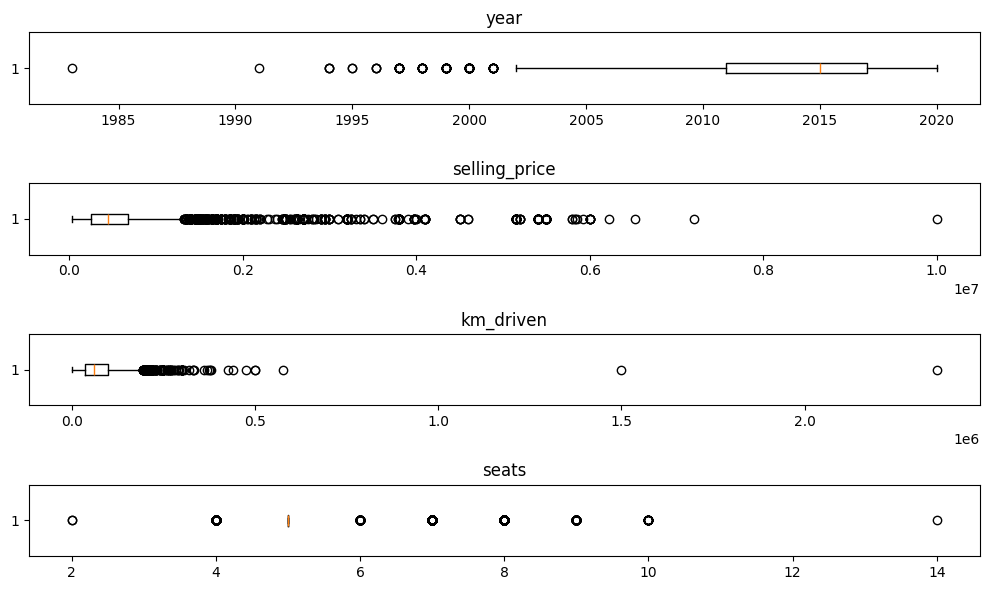

In [209]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for numerical columns
plt.figure(figsize=(10, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


The circles in each graph, outside the boxplot are all outliers

## 4. Standardizing Data formates

In [210]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


By looking at the above dataset all is perfect, we don't need to change any column's datatype our units

# 1. Removing Null values

In [212]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [213]:
# missing values in percentage
(df.isnull().sum()/df.shape[0])*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [214]:
df.dropna(inplace=True)

In [215]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [216]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# 2. Removing Duplicate Values from Dataset

In [217]:
df_cleaned = df.drop_duplicates(subset='name')

In [218]:
df_cleaned = df.drop_duplicates(subset='year')

In [219]:
df_cleaned = df.drop_duplicates(subset='selling_price')

In [220]:
df_cleaned = df.drop_duplicates(subset='km_driven')

In [221]:
df_cleaned = df.drop_duplicates(subset='fuel')

In [222]:
df_cleaned = df.drop_duplicates(subset='seller_type')

In [223]:
df_cleaned = df.drop_duplicates(subset='transmission')

In [224]:
df_cleaned = df.drop_duplicates(subset='owner')

In [225]:
df_cleaned = df.drop_duplicates(subset='mileage')

In [226]:
df_cleaned = df.drop_duplicates(subset='engine')

In [227]:
df_cleaned = df.drop_duplicates(subset='max_power')

In [228]:
df_cleaned = df.drop_duplicates(subset='torque')

In [229]:
df_cleaned = df.drop_duplicates(subset='seats')

# 3. Removing Outliers 

Remove outliers from columns in a dataset, you can use various methods in Python with the pandas library. Here are some common techniques:

1. Using the Interquartile Range (IQR) Method:
This method involves calculating the IQR and removing values that lie beyond a specified range (usually 1.5 times the IQR).

2. Using Z-Score:
The Z-Score method involves calculating the standard deviation and removing values that are a specified number of standard deviations away from the mean (usually 3).

I will use IQR method to remove outliers

In [230]:
# making function 
def remove_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
    return df

In [231]:
# applying function
for column in df.select_dtypes(include=['float','int64']).columns:
    df=remove_outliers_iqr(df,column)
    print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

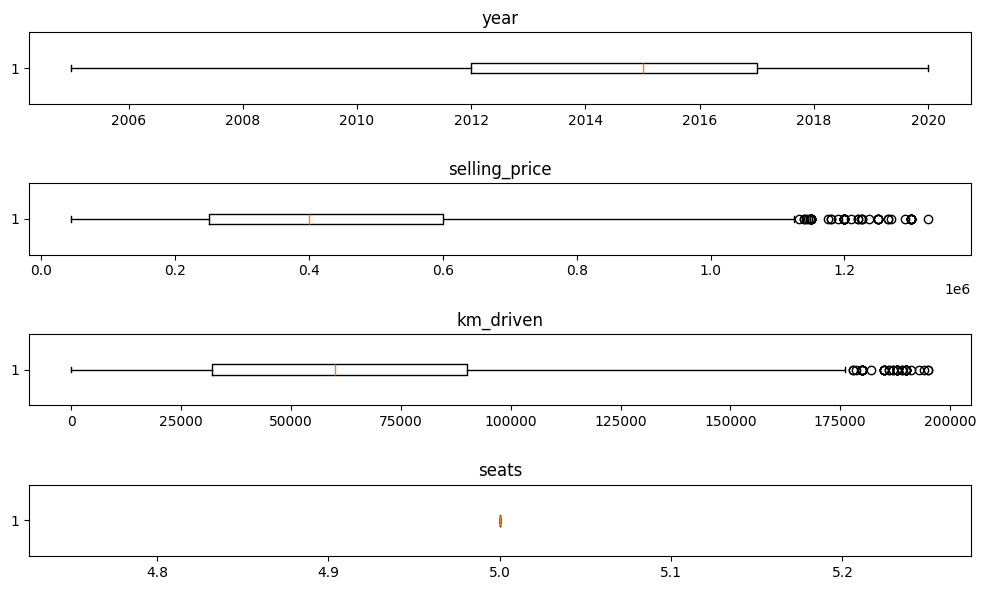

In [232]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()

You can see that we have almost removed all the outliers from the data

# 4. Feature Engineering

In [233]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In above name column you can see that the name of car and company name are written together so we should first solve it 

In [234]:
df['name'][0]

'Maruti Swift Dzire VDI'

I will used slicing techique to seprate company name from car name

In [235]:
x=df['name'][0]
x[:x.index(" ")]

'Maruti'

Now I had seprated only first entity present in first row, its company name and car name, I will make a costumized function so that I can apply it to all the rows

In [236]:
def com_name(x):
    return x[:x.index(" ")]

In [237]:
df['name'].apply(com_name)

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 5672, dtype: object

look the company name is seprated from car name

Now adding this new column to our dataset

In [238]:
df['company_name']=df['name'].apply(com_name)

In [239]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


Now company name is seprated, I will repeat the above process to make column of car name

In [240]:
def car_name(x):
    return x[x.index(" ")+1]

In [243]:
df['car_name']=df['name'].apply(car_name)

In [244]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company_name,car_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,S
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,R
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,C
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,S


In [246]:
df['car_name']

0       S
1       R
2       C
3       i
4       S
       ..
8123    i
8124    V
8125    S
8126    I
8127    I
Name: car_name, Length: 5672, dtype: object